Importación de librerías:

In [1]:
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importación de la base de datos Fashion Mnist:

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

Carga de data y ajuste de variables para trabajar con los datos de Fashion_Mnist:

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
x_train=train_images.reshape(60000,784)
x_test = test_images.reshape(10000, 784)
y_train = train_labels
y_test = test_labels

4423680/4422102 [==============================] - 0s 0us/step


Carga del MLP y resultado del score:

In [5]:
mlperceptron = MLPClassifier(solver='sgd', hidden_layer_sizes=(25), activation='logistic',max_iter=500, early_stopping=True, verbose=False,warm_start=False)
mlperceptron.fit(x_train, y_train)
predictions = mlperceptron.predict(x_test)
# Use score method to get accuracy of model
score = mlperceptron.score(x_test, y_test)
print(score)

0.8224


Matriz de confusión:

In [6]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[863   5  22  41   9   1  41   0  18   0]
 [  4 961   7  21   4   0   1   0   2   0]
 [ 29   7 737   7 179   1  36   0   4   0]
 [ 53  32  13 826  45   1  25   0   4   1]
 [  3   4 126  38 773   2  49   0   5   0]
 [  0   2   0   0   0 903   0  47   8  40]
 [243   0 151  31 149   0 399   0  27   0]
 [  0   0   0   0   0  50   0 901   1  48]
 [  3   0  25  10   8  11   8   4 930   1]
 [  0   0   0   0   0  27   0  41   1 931]]


Matriz de confusión detallada:

Text(0.5, 1.0, 'Accuracy Score: 0.8224')

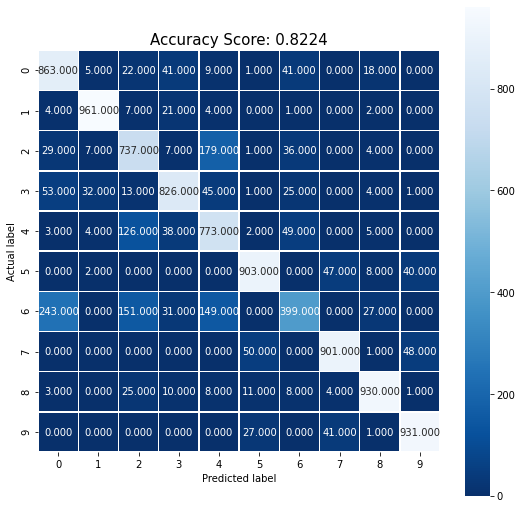

In [7]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

Imágenes:

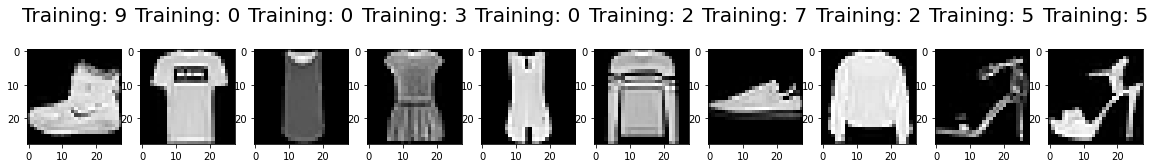

In [8]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_images[0:10], train_labels[0:10])):
  plt.subplot(1, 10, index + 1)
  plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize = 20)

Accuracy:

In [11]:
acc = accuracy_score(y_test, predictions, normalize=False)
print("Number of Correct predicted: " + str(acc) +" of "+ str(len(y_test)))
print(acc / len(y_test))

Number of Correct predicted: 8224 of 10000
0.8224


F1 score:

In [10]:
f1_score(y_test, predictions, average='macro')

0.8171791037303731